# 学習結果の確認

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import model

/home/smurakami/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# グラフの構築

In [2]:
X_input = tf.placeholder(np.uint8, shape=[None, 784])

In [3]:
image = tf.reshape(X_input, [-1, 28, 28, 1])

In [4]:
image_normed = tf.cast(image, tf.float32) / 255.0 * 2 - 1

In [5]:
with tf.variable_scope('classifier', reuse=tf.AUTO_REUSE):
    y_predicted_ = model.classifier(image_normed, classnum=12)

In [6]:
y_input = tf.placeholder(np.int64, [None])

In [7]:
y_input_ = tf.one_hot(y_input, 12)

In [8]:
y_predicted = tf.argmax(y_predicted_, axis=1)

In [9]:
acc = tf.reduce_mean(tf.cast(tf.equal(y_input,    y_predicted), tf.float64))

In [10]:
loss = -tf.reduce_mean(y_input_ * tf.log(y_predicted_))

In [11]:
opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# データのロード

In [12]:
import glob

In [13]:
classnames = [line.strip() for line in open('instrument_categories.txt') if line.strip() != ""]
classnames =list(sorted(classnames))
filenames = ['data/{}.npy'.format(classname) for classname in classnames]

In [14]:
X = []
y = []
for index, file in enumerate(filenames):
    data = np.load(file)
    X.append(data)
    y.append(np.ones(len(data), dtype=int) * index)
    
X = np.vstack(X)
y = np.hstack(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [16]:
from tqdm import tqdm

batch_num = 128

sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, './checkpoint/model-19')
    
# loss_buf = []
# acc_buf = []
# for index in tqdm(range(0, len(X_test), batch_num)):
#     X_batch = X_test[index:index+batch_num]
#     y_batch = y_test[index:index+batch_num]
#     loss_test, acc_test = sess.run([loss, acc], {X_input: X_batch, y_input: y_batch})
#     loss_buf.append(loss_test)
#     acc_buf.append(acc_test)

# loss_test = np.mean(loss_buf)
# acc_test = np.mean(acc_test)

# print("loss_test: {}, acc_test: {}".format(loss_test, acc_test))


        

INFO:tensorflow:Restoring parameters from ./checkpoint/model-19


In [33]:
import scipy
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 280px; height: 280px;">
<canvas width="140" height="140", style="border: solid 2px #666; width: 280px; height: 280px;"></canvas>
</td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
<button onclick="set_value()">Save</button>

</td>
</table>
"""

javascript="""
<script type="text/Javascript">
	var pixels = [];
	for(var i = 0; i < 28*28; i++) pixels[i] = 0
	var click=0;
	var button_state=0;
    
    var width = 140;
    var height = 140;
    
	var canvas = document.querySelector("canvas");
    var prev = null;
    
    canvas.addEventListener("mousedown", function(e){
        button_state=1;
        prev = {x: e.offsetX/2, y: e.offsetY/2};
    });
    canvas.addEventListener("mouseup", function(e){
        button_state=0;
//        set_value();
    });
    canvas.addEventListener("mouseleave", function(e){
        button_state=0;
    });
	
	canvas.addEventListener("mousemove", function(e){
        if(button_state){
            var pos = {x: e.offsetX/2, y: e.offsetY/2};;
            click = 1;
            canvas.getContext("2d").beginPath()
            canvas.getContext("2d").lineCap = "round";
			canvas.getContext("2d").lineWidth = 8;
			canvas.getContext("2d").strokeStyle = 'rgba(0, 0, 0, 1)';
			canvas.getContext("2d").moveTo(prev.x, prev.y);
			canvas.getContext("2d").lineTo(pos.x, pos.y);
			canvas.getContext("2d").stroke();
//            canvas.getContext("2d").endPath()
            prev = pos;
            
		}else{
//            if(click == 1) set_value()
			click = 0;
		}
	});
    
    function callback(out_type, out_data){
        // do_something
        console.log(out_data);
    }
	
	function set_value(){
        var pix = canvas.getContext("2d").getImageData(0, 0, width, height).data;
		var result = "";
		for(var i=0;i<pix.length;i++) result += pix[i] + ",";
		var kernel = IPython.notebook.kernel;
		kernel.execute("image = [" + result + "]");
		kernel.execute("image = np.array(image)");
		kernel.execute("image = image.reshape(" + height + ", " + width + ", 4)");
		kernel.execute("image = image[:, :, 0:3].sum(axis=2)/3");
		kernel.execute("image = scipy.misc.imresize(image, (28, 28))");       
		kernel.execute("image = 1 - (image / 255.0)");       
		kernel.execute("image = (image * 255).astype(np.uint8)");       
	}
	
	function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
		canvas.getContext("2d").fillRect(0,0, width,height);
		for(var i=0;i<28*28;i++) pixels[i]=0
	}
    
    clear_value()
</script>
"""

from IPython.display import HTML
HTML(input_form + javascript)

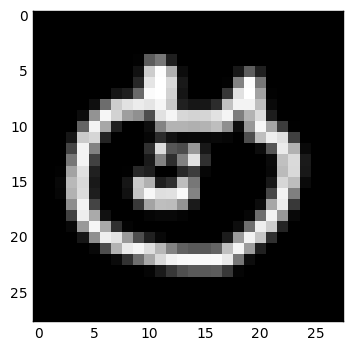

In [39]:
plt.imshow(image, interpolation='nearest', cmap='gray')

In [40]:
idx = sess.run(y_predicted, {X_input: image.reshape(-1, 784)})[0]
print(classnames[idx])

cat


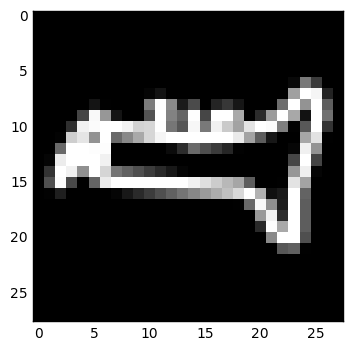

In [41]:
plt.imshow(X_train[0].reshape(28, 28), interpolation='nearest', cmap='gray')

In [42]:
sess.run(y_predicted, {X_input: X_train[0].reshape(-1, 784)})

array([9])

In [43]:
y_predicted_

<tf.Tensor 'classifier/Softmax:0' shape=(?, 12) dtype=float32>

In [44]:
saver.save(sess, 'tmp/model.ckpt')

'tmp/model.ckpt'

In [18]:
builder = tf.saved_model.builder.SavedModelBuilder('./saved_model')

In [19]:
builder.add_meta_graph_and_variables(sess,
                                       [tf.saved_model.tag_constants.TRAINING],
                                       signature_def_map=None,
                                       assets_collection=None)

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.


In [21]:
builder.save()

INFO:tensorflow:SavedModel written to: b'./saved_model/saved_model.pb'


b'./saved_model/saved_model.pb'

In [24]:
y_predicted_.name

'classifier/Softmax:0'